<a href="https://www.kaggle.com/code/ayushs9020/re-creating-sgd-regressor-from-scratch?scriptVersionId=136408898" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# SGD Regressor

$SGD$ $Regressors$ are a type of `machine learning algorithms` that uses `stochastic gradient descent` to solve `regression problems`. $SGD$ $Regressors$ work by `iteratively updating` the `model weights` using a small `random subset of the training data`, rather than the entire dataset. This makes them computationally efficient for large datasets.

Note - You can find many similarities between this notebook and `Re-Creating Linear Regression | Derivation|🚀` of the same competition. Similarities will only for the `basic terminolgies and concepts`

# 1 | Basic Terminologies 🧿

* $Slope$
* $Diffrentiation$
* $Intercept$

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.display import IFrame

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 1.1 | Slope of A function

First of all lets get a little bit more deep into equation $y = mx + b$

So what does these terms resembles in this eqution. 
* `m` is the slope of the line

Slope of a function shows how steep a function is, or the direction of a function at a given point on the curve.

Lets assume we have this curve $y = 4x^2$ the slope of this curve will be $y = 8x$

In [2]:
IFrame("https://www.desmos.com/calculator/zluqu5vyuh" , 1000 , 400)

So how do we calculate the `slope` of a line???

Lets assume we have a function $y = f(x)$,. To find the slope of a function, we simply diffrenctiate the function, thus, the slope of this line will be $y^` = f^`(x)$

## 1.2 | Diffrentiation

Diffrentaition can be explained as getting a small value of a function.

lets assume we have a function `y = sin(x)`

A small strip at that function will demonstrate taking a derivative of that function `sin(x)`.

Taking about the function we had taken before that is $y = 4x^2$

Taking its derivative we will get $$y = 8x$$ ($x{n^`} = nx^{n-1}$)

So the slope of $y = 4x^2$ can be represnted as 

In [3]:
IFrame("https://www.desmos.com/calculator/hrguwktg9q" , 1000 , 400)

So now we have a basic idea of `slope`

## 1.3 | Intercept

Now what `b` represents in the data. Usually it is called the `intercept`. Consider this graph of the equation $y = x$ or $y = 1x + b$ 


In [4]:
IFrame("https://www.desmos.com/calculator/gai0veg5fh" , 1000 , 400)

This line passes the axis at $(0 , 0)$. These coordinates are called as the `intercepts` of this line. If we make `b` or `intercept` as $1$. The line will then pass from $(1 , -1)$. Basically the `intercept` moves a line in a plane. With that being said, Lets also undertand how the `slope` changes the line. If we make `m` as $2$. The line will rotate anti-clockwise. So as we increase the value of `m` or `slope`. The line moves anti-clockwise, And so the vice-versa, If we decrease the value of `m`, The slope will move in the clockwise direction. 

In short tweeking the values of `m` and `b` or `slope` and `intercept`. We can move the line in any direction and in any way we want `as long as it resembles a straight line`. We still cannot bend the line 

So now we have any data, we just need to difine the values of `slope` and `intercpet`. And we can get the best fit line. But still the question arises how do we generalize the values of these tuning parametes. 

In simple word we can say, How can we find a relation between the data we have and these tuning parameters. So that we only need to define that relationship and then we can easily predict the values. 

# 2 | Intution 🌌

In [5]:
import os
import tqdm
import pandas as pd

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s3e19/sample_submission.csv
/kaggle/input/playground-series-s3e19/train.csv
/kaggle/input/playground-series-s3e19/test.csv


Lets assume we have data like this

In [6]:
features = np.array([x for x in range(0 , 200 , 1)])

features

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [7]:
target = np.array([x for x in range(0 , 400 , 2)])

target

array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128,
       130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154,
       156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180,
       182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206,
       208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232,
       234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258,
       260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284,
       286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310,
       312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336,
       338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 36

Lets assume there is a connection between the `target` , and `features`. By human instacne we know that every element in `target` is just a double of the corresponding element in `features`, or $target  = 2XFeatures$. 

Lets assume we change the target a little bit...

In [8]:
target = np.array([x + 1 for x in range(0 , 400 , 2)])

target

array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
       131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207,
       209, 211, 213, 215, 217, 219, 221, 223, 225, 227, 229, 231, 233,
       235, 237, 239, 241, 243, 245, 247, 249, 251, 253, 255, 257, 259,
       261, 263, 265, 267, 269, 271, 273, 275, 277, 279, 281, 283, 285,
       287, 289, 291, 293, 295, 297, 299, 301, 303, 305, 307, 309, 311,
       313, 315, 317, 319, 321, 323, 325, 327, 329, 331, 333, 335, 337,
       339, 341, 343, 345, 347, 349, 351, 353, 355, 357, 359, 36

Now what could be the trend here..., We can see the code above and with the help of that we can say. That `target` value is just the `double + 1` of the corresponding element in `features`. or $target = 2Xfeatures + 1$

Till now the problem was really easy to solve, and thats why we used the brain only, But these are just examples. As we move closer to the real world. The examples/problems get difficulat and we find it harder to find proper trends in the two `arrays`. Thats we try to teach machine, how to find trend in the data. The formula we had before $target = 2Xfeature + 1$ is subjective to only one problem or a similar problem. But this formula can be generlized by the equation of `straight line`, which is $y = mx + b$

So what does this line means ???

Lets first try to plot the data we had on a scatter plot 

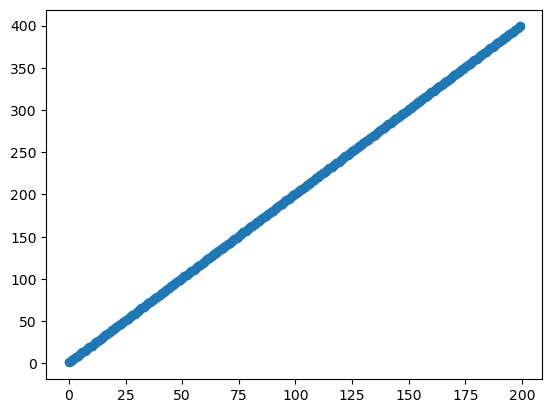

In [9]:
plt.scatter(features , target)

We can see we got a sequence of dots that resembles kind of straight line 

Lets assume we have a line that tries to capture most of the points on this, like this

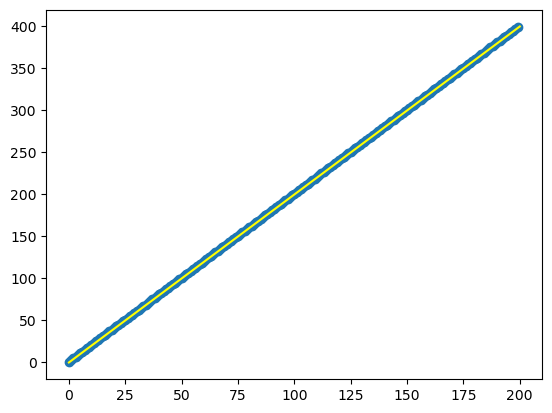

In [10]:
plt.scatter(features , target)
plt.plot([0 , 200] , [0 , 400] , "yellow")

Again by human intution we found the `best fit line`. But what if we get this kind of 

<Axes: ylabel='num_sold'>

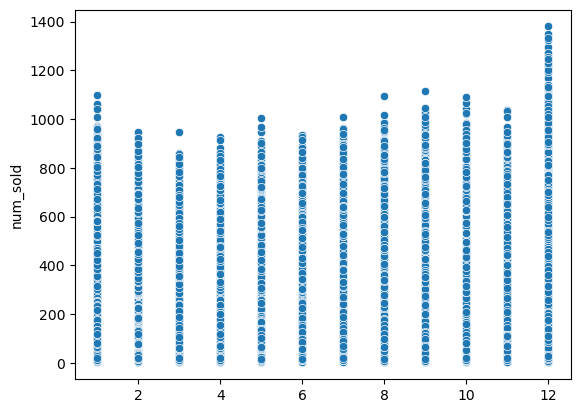

In [11]:
data = pd.read_csv("/kaggle/input/playground-series-s3e19/train.csv")

features = np.array([x for x in pd.DatetimeIndex(pd.to_datetime(data["date"])).month])

target = data["num_sold"]

sns.scatterplot(x = features , y = target)

At this point it becomes difficult 

Lets assume we randomly select a line 

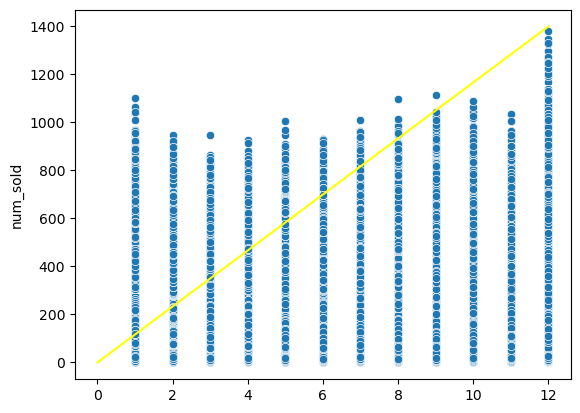

In [12]:
sns.scatterplot(x = features , y = target)
plt.plot([0 , 12] , [0 , 1400] , "yellow")

If we test this line on the training data only, we will find that this line is not correct. It is predicting points incorrect, We know that the best fit line we drew first, will predict points wiht lowest incorrect ones. For example the line we just defined if asked the corresponding value of $200$, it will say $250$. But rather it was $400$. There was some `error`, some `loss`, or some `cost` with the `actual` and `predicted` values.

For measuring this loss, what we can do is find the difference between the `actual value` and the `predicted value`. A best fit line will give the lowest value of this difference.

The word difference here is very difficult to say, so we can give this term a new fancy name, which is `The Loss`.

One can deifne loss as $$Loss = actual - predicted$$.

We only took the example of one value. but there are a large group of values. that can show the same trait, For that we can change the formula to 

Lets denote $actual$ as $a$ and $predicted$ as $p$

$$Loss = (a_1 - p_1) + (a_2 - p_2) + (a_3 - p_3) + ... + (a_n - p_n)$$

or $$Loss = \sum\limits_{i = 1}^{n}a_i - p_i$$ or $$Loss = \sum\limits_{i = 1}^{n}(y_i - \hat y_i)$$

Whenever you see $\hat y$, think of it as the `predicted value`

Now lets assume we have data like this and a random line is drawn like this 

<img src = "https://cdn-media-1.freecodecamp.org/images/MNskFmGPKuQfMLdmpkT-X7-8w2cJXulP3683" width = 400>

If we look closely, a lot of error terms will tend to cancel out each other. We can also get into a state where the line is `not the best fit`, but still gives $0$ error. With the `Loss` we defined before, we are not chossing a `best fit line`. Rather we are chossing a line that is in the `middle` of those points. One way to counter this is to add a `modulus` function like this $$Loss = \sum\limits_{i = 1}^{n}|y - \hat y|$$
But what is a modulus function. The function is nothing but converts, any negative numbers to postive. For example 
$|-1| = 1$

In [13]:
IFrame("https://www.desmos.com/calculator/kamxotjra2" , 1000 , 400)

But there is a problem with this function. A `modulus` is not diffrentiable. You might be thinking that why are we even seeing that part, like we we care for that. Why would you even diffrentiate a loss function. 

We actually diffrentiate loss function in further steps, thats why we will not use the modulus function. 

Another way of doing so is to, square the loss function like this $Loss = (y - \hat y)^2$

Its cool, its good and we can even diffrentiate this...

Now we have a basic idea that we need to compute `m` and `b` for the lowest loss values. Now we should come to know how we can do this 

What if we somehow interelate the `losses` and `m and b`. 

Lets assume we intialize the parameters randomly, like this 

In [14]:
weights = np.random.randn(1)

biases = np.random.randn(1)

weights , biases

(array([0.8638606]), array([0.15021489]))

And get some predictions on the first set of the values

In [15]:
pred = weights * features[0] + biases

pred

array([1.01407549])

And its way far than what we had expected. 

In [16]:
loss = (pred - target[0])

loss

array([-61.98592451])

Our main motive is to reduce this loss as much as possible,. 

What if we subtract a small subset of the derivative of this loss from the parameters like this. The derivative of the loss will show us the steepness of the curve, and thus doing so might get us to the valeus of minimum loss. So how do we find the derivative of this function $Loss = (y - \hat y)^2$. What we know is $\hat y = mx + b$. COmputing this value in we get $$Loss = (y - mx - b)^2$$, Now we can diffrentiate the function

## Diffrentiating wrt `b`
$$\frac {dLoss}{db}= \frac {d}{db}(y - mx - b)^2$$
$$= 2(y - mx - b)(-1)$$

## Diffrentiating wrt `m`
$$\frac {dLoss}{dm} = \frac {d}{dm}(y - mx - b)^2$$
$$= 2(y - mx - b)(-x)$$

In [17]:
weights -= (-2* (target[0] - weights*features[0] - biases)) * 0.001

biases -= (2 * target[0] * (target[0] - weights * features[0] - biases)) * 0.01

And if we then try to predict the values 

In [18]:
print(weights)
print(biases)
loss = (features[0] - (weights * target[0] + biases))
loss

[0.98783245]
[-77.79584546]


array([16.56240126])

Our losses have been decreased, so lets do it again 

In [19]:
weights -= -2 * loss * 0.01
biases -= -2 * features[0] * loss * 0.01
print(weights)
print(biases)
loss = (target[0] - (weights * features[0] + biases))
loss

[1.31908047]
[-77.46459744]


array([139.14551696])

In [20]:
weights -= -2 * loss * 0.01
biases -= -2 * features[0] * loss * 0.01
print(weights)
print(biases)
loss = (target[0] - (weights * features[0] + biases))
loss

[4.10199081]
[-74.6816871]


array([133.57969628])

So now we know if we do this iteratively, we will minimise the loss, and iteratively we will reach the optimal values of `weights` or `m` and `biases` or `m`

Lets say we have runn this again and again for around 100 times 

In [21]:
for _ in range(100):
    weights -= -2 * loss * 0.01
    biases -= -2 * features[0] * loss * 0.01
    loss = (target[0] - (weights * features[0] + biases))

Lets now see the weights and biases 

In [22]:
weights , biases

(array([69.76507289]), array([-9.01860502]))

Lets do this all again, and now we will also try to plot a graph

In [23]:
weights = abs(np.random.randn(1))
biases = abs(np.random.randn(1))
losses = []
for _ in range(100):
    weights -= -2 * loss * 0.01
    biases -= -2 * features[0] * loss * 0.01
    loss = (target[0] - (weights * features[0] + biases))
    losses.append(loss)

<Axes: >

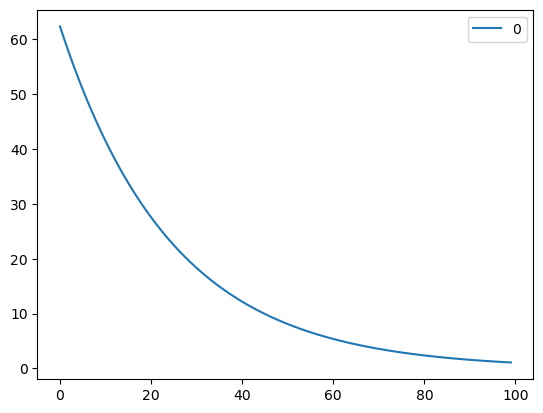

In [24]:
sns.lineplot(np.array(losses))

As we can see we have greatly decreased our losses 

Now we just need to put this all into a function 

# 3 | Functionalities

We have made out our **SGDRegressor**, now we need to add some functionalities to it. We can get funcitonalites form **[Scikit-Learn](https://scikit-learn.org/)=>[Stable](https://scikit-learn.org/stable/)=>[Linear Model](https://scikit-learn.org/stable/modules/linear_model.html)=>[SGD Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)**

|Name|Attribute|Accpeted|Default|Info|Applied
|---|---|---|---|---|---
|List of Columns|||||✅
|Loss|`str`|`squared_error`|The loss function to be used|✅
|Alpha|`alpha`|`float`|$0.0001$|Constant that multiplies the regularization term. The higher the value, the stronger the regularization. Also used to compute the learning rate when set to `learning_rate` is set to ‘optimal’|✅
|Fit Intercept|`fit_intercept`|`bool`|`True`|Whether the intercept should be estimated or not. If False, the data is assumed to be already centered|✅
|Max Iteration|`max_iter`|`int`|`1000`|The maximum number of passes over the training data (aka epochs). It only impacts the behavior in the fit method, and not the `partial_fit` method.
|Shuffle|`shuffle`|`bool`|`True`|Whether or not the training data should be shuffled after each epoch.
|Epsilon|`epsilon`|`float`|$0.1$|Epsilon in the epsilon-insensitive loss functions; only if `loss` is ‘huber’, ‘epsilon_insensitive’, or ‘squared_epsilon_insensitive’. For ‘huber’, determines the threshold at which it becomes less important to get the prediction exactly right. For epsilon-insensitive, any differences between the current prediction and the correct label are ignored if they are less than this threshold.
|Early Stopping|`early_stopping`|`bool`|`False`|Whether to use early stopping to terminate training when validation score is not improving. If set to True, it will automatically set aside a fraction of training data as validation and terminate training when validation score returned by the score method is not improving by at least tol for n_iter_no_change consecutive epochs.
|Validation Fraction|`validation_fraction`|`float`|$0.1$|The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. Only used if `early_stopping` is True.

## 3.1 | List Of Columns 

This function will only work if there are only $2$ columns, one `feature` and the other one `target`. What if the user gives out a list of columns. For this we nee dto take two different arguemnts form the user and work on them differently

In [25]:
def SGDRegressor(X , y):
    
    weights = abs(np.random.randn(X.shape[0]))
    biases = abs(np.random.randn(1))
    
    predic = []
    losses = []
    
    for _ in range(300):
    
        pred = weights * features + biases
        
        loss = np.sum((pred - y) ** 2)
        losses.append(loss)
        
        weights -= -2 * loss * 0.01
        biases -= -2 * 30 * loss * 0.01

    return weights , biases

## 3.2 | Losses 

First of all we need to understand more about losses. 

## 3.2.1 | Squared Loss
`squared_loss` - is just the loss we just created which is also called `Ordinary Least Sqaures`. which we had already implemented. for making it more easieir to use, lets just use a helper function, and just transfer some things there 

In [26]:
squared_mean = lambda predictions , actuals : np.sum((predictions - actual) ** 2)

def SGDRegressor(X , y):
    
    weights = abs(np.random.randn(X.shape[0]))
    biases = abs(np.random.randn(1))
    
    predic = []
    losses = []
    
    for _ in range(300):
    
        pred = weights * features + biases
        
        loss = squared_mean(pred , y)
        losses.append(loss)
        
        weights -= -2 * loss * 0.01
        biases -= -2 * 30 * loss * 0.01

    return weights , biases

Now it will be easier to use different tyoes of losses, now we will just need to define the loss functions and define which one to use.

## 3.2.2 | Huber Loss

Our second one is `huber`. So what is this huber loss...?
 
Lets assume we have a data like this  

In [27]:
features = np.array([x for x in range(20)])
target = []
for i in range(20):
    if i < 4 : 
        target.append(i ** (1 / 10))
    else : 
        target.append(i ** (1 / 2))
target = np.array(target)

features , target

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([0.        , 1.        , 1.07177346, 1.11612317, 2.        ,
        2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ,
        3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739,
        3.87298335, 4.        , 4.12310563, 4.24264069, 4.35889894]))

If we try to plot this, we get this 

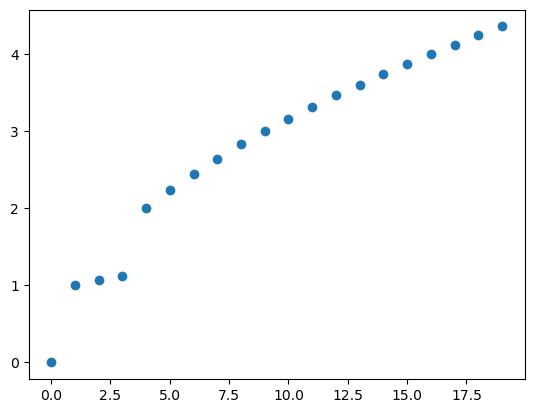

In [28]:
plt.scatter(features , target)

If we try to plot a line that fits thew best for this line, we can do something like this 

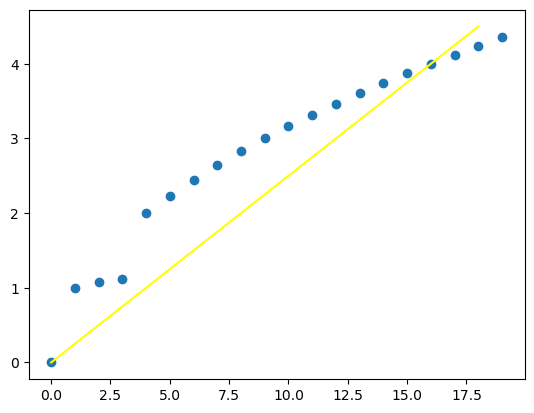

In [29]:
plt.scatter(features , target)
plt.plot([0 , 18] , [0, 4.5] , "yellow")

It should loos something like this.

But there is a problem with this guy, he had distorted himself, because of the **outliers**, and thus is not a very good line. To balanace this what we can use is `Mean Absolute Error` instead `Mean Sqaured Loss`. So what is this `Mean Absolute Error`...? 

`Mean Absolute Error` is just like the lost brother of `Mean Sqaured Error`. Its formula is same but with a small tweek 

$$Loss = |y - \hat y|$$

You might be thinking that we suggested this loss before and this was not good one, because it was not diffrentiable, so what now...???

Guess what, we found a way to find the alternative, for other losses we compute the gradients as a whole, for this, we find sub-gradients and move on with life. 

But there is problem with this type of loss too

Lets try to plot a line we get from this 

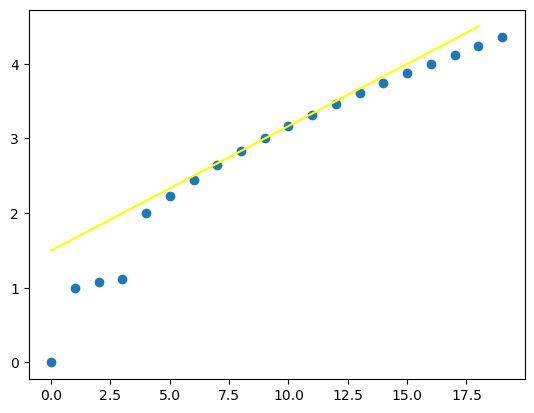

In [30]:
plt.scatter(features , target)
plt.plot([0 , 18] , [1.5, 4.5] , "yellow")

This will do predictions really great for the major points, and will just ignore the outliers, which is a good point. But lets assume we have a greater amount of outliers. 

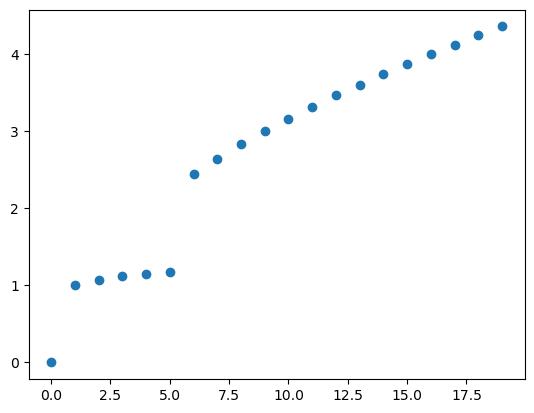

In [31]:
features = np.array([x for x in range(20)])
target = []
for i in range(20):
    if i < 6 : 
        target.append(i ** (1 / 10))
    else : 
        target.append(i ** (1 / 2))
target = np.array(target)

plt.scatter(features , target)

If we choose the `Mean Absolute Error`, the line will be something like this 

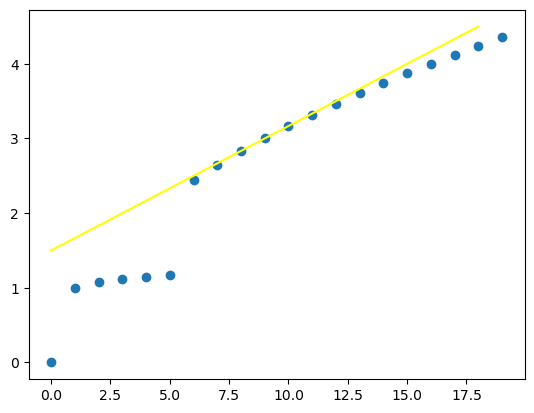

In [32]:
plt.scatter(features , target)
plt.plot([0 , 18] , [1.5, 4.5] , "yellow")

But at this point the amount of outliers have risen up so much that they are no more outliers, they have their own community and maybe goverment.So how do we handle this...?

If we use `Mean Sqaured Error`, it will focus on the lower points more than the above points, and if we choose the `Mean Absolute Error`, it will focus on the upper points more than the above points. To counter this type of problem what we use is the combination of these two losses. Something like this $$Loss = \Bigg [ \frac {\frac {1}{2}(y - \hat y)^2}{\delta|y - \hat y| - \frac {1}{2}\delta^2}\frac {...if...}{...if...}\frac {y - \hat y|<=\delta}{|y - \hat y|>\delta}$$

But what is $\delta$ doing here..?

This is a actually a hyperparameter usually having the value as $0.2$. 

Now as we know about the huber loss lets try to implement this 

In [33]:
squared_mean = lambda predictions , actuals : np.sum((predictions - actual) ** 2)

def huber_loss(prediction , actuals):
    loss = 0
    for pred , act in zip(predictions , actuals):
        if abs(pred - act) <= 0.2:
            loss += (1 / 2) * pred - act
        else :
            loss += (0.2 * abs(pred - act)) - ((1 / 2) * (0.2 ** 2))
    return loss

def SGDRegressor(X , y , loss = "sqaured_mean"):
    
    weights = abs(np.random.randn(X.shape[0]))
    biases = abs(np.random.randn(1))
    
    predic = []
    losses = []
    
    for _ in range(300):
    
        pred = weights * features + biases
        if loss == "sqaured_mean":
            loss = squared_mean(pred , y)
        else : 
            loss = huber(pred , y)
        losses.append(loss)
        
        weights -= -2 * loss * 0.01
        biases -= -2 * 30 * loss * 0.01

    return weights , biases

## 3.2.3 | Epsilon Intensive

This is a type of baseline loss, it generates a lower cap for the loss, it ignores the loss below the `epsilon` value.

Its default value is $0$.

Now lets try to make tweeks to our functions

In [34]:
squared_mean = lambda predictions , actuals : np.sum((predictions - actual) ** 2)

def huber_loss(prediction , actuals , delta):
    loss = 0
    for pred , act in zip(predictions , actuals):
        if abs(pred - act) <= delta:
            loss += (1 / 2) * pred - act
        else :
            loss += (delta * abs(pred - act)) - ((1 / 2) * (delta ** 2))
    return loss

epsilon_intensive = lambda predictions , actuals , epsilon : np.where((predictions - actuals) < epsilon , 0 , (predictions - actuals))

def SGDRegressor(X , y , loss_type = "sqaured_mean" , delta = 0.2 , epsilon = 0):

    weights = abs(np.random.randn(X.shape[0]))
    biases = abs(np.random.randn(1))

    predic = []
    losses = []

    for _ in range(300):

        pred = weights * features + biases
        if loss_type == "sqaured_mean":
            loss = squared_mean(pred , y , delta)
        elif loss_type == "huber" :
            loss = huber(pred , y)
        else :
            loss = epsilon_intensie(pred , y , epsilon)
        losses.append(loss)

        weights -= -2 * loss * 0.01
        biases -= -2 * 30 * loss * 0.01

    return weights , biases

## 3.3 | Alpha

You remeber we were taking a small part of the loss, not the whole loss. The parameter that defines how much loss we are taking is called the **alpha** , also called as the learning rate.

You might be thinking that it is not that important, but it is really important concept, a higher learning rate has a high chance that you will never converge to the model, a low very low learning rate means that you will take a very long time to converge for the model

Here is a very good image that explains the importance of the learning rate

<img src = "https://www.researchgate.net/profile/Hajar-Feizi/publication/341609757/figure/fig2/AS:894745802977280@1590335431623/Changes-in-the-loss-function-vs-the-epoch-by-the-learning-rate-40.png" width = 400>

It will be really easy for us to apply this functinality, we just need to change some varaibales

In [35]:
squared_mean = lambda predictions , actuals : np.sum((predictions - actual) ** 2)

def huber_loss(prediction , actuals , delta):

    loss = 0

    for pred , act in zip(predictions , actuals):

        if abs(pred - act) <= delta:

            loss += (1 / 2) * pred - act

        else :

            loss += (delta * abs(pred - act)) - ((1 / 2) * (delta ** 2))

    return loss

epsilon_intensive = lambda predictions , actuals , epsilon : np.where((predictions - actuals) < epsilon , 0 , (predictions - actuals))

def SGDRegressor(X , y , loss_type = "sqaured_mean" , delta = 0.2 , epsilon = 0 , alpha = 0.0001):

    weights = abs(np.random.randn(X.shape[0]))
    biases = abs(np.random.randn(1))

    predic = []
    losses = []

    for _ in range(300):

        pred = weights * features + biases

        if loss_type == "sqaured_mean":

            loss = squared_mean(pred , y , delta)

        elif loss_type == "huber" :

            loss = huber(pred , y)

        else :

            loss = epsilon_intensie(pred , y , epsilon)
        losses.append(loss)

        weights -= -2 * loss * alpha
        biases -= -2 * X * loss * alpha

    return weights , biases

## 3.4 | Fit_Intercept
Lets assume we have a data that is centered, means there is a very low chance that its $\beta$ or $intercept$ will be non-zero. So we can save some computation and time by not calculating the $\beta$ everytime, Yes we are greedy. This parameter decides whether the $\beta$ should be calculated or not

In [36]:
squared_mean = lambda predictions , actuals : np.sum((predictions - actual) ** 2)

def huber_loss(prediction , actuals , delta):

    loss = 0

    for pred , act in zip(predictions , actuals):

        if abs(pred - act) <= delta:

            loss += (1 / 2) * pred - act

        else :

            loss += (delta * abs(pred - act)) - ((1 / 2) * (delta ** 2))

    return loss

epsilon_intensive = lambda predictions , actuals , epsilon : np.where((predictions - actuals) < epsilon , 0 , (predictions - actuals))

def SGDRegressor(X , y ,
                 loss_type = "sqaured_mean" , delta = 0.2 ,
                 epsilon = 0 , alpha = 0.0001 ,
                fit_intercept = True):

    weights = np.zeors(shape = X.shape[0])
    biases = np.zeors(1)

    predic = []
    losses = []

    for _ in range(300):

        pred = weights * features + biases

        if loss_type == "sqaured_mean":

            loss = squared_mean(pred , y , delta)

        elif loss_type == "huber" :

            loss = huber(pred , y)

        else :

            loss = epsilon_intensie(pred , y , epsilon)
        losses.append(loss)

        weights -= -2 * loss * alpha
        if fit_intercept:
            biases -= -2 * 30 * loss * alpha

    return weights , biases

## 3.5 | Max_Iter

This is the number of times we will run the function. Previously we were running for $300$ times. Now we can add that as a functionality to our code and make it a hyperparameter instead

In [37]:
squared_mean = lambda predictions , actuals : np.sum((predictions - actual) ** 2)

def huber_loss(prediction , actuals , delta):

    loss = 0

    for pred , act in zip(predictions , actuals):

        if abs(pred - act) <= delta:

            loss += (1 / 2) * pred - act

        else :

            loss += (delta * abs(pred - act)) - ((1 / 2) * (delta ** 2))

    return loss

epsilon_intensive = lambda predictions , actuals , epsilon : np.where((predictions - actuals) < epsilon , 0 , (predictions - actuals))

def SGDRegressor(X , y ,
                 loss_type = "sqaured_mean" , delta = 0.2 ,
                 epsilon = 0 , alpha = 0.0001 ,
                fit_intercept = True , max_iter = 1000):

    weights = np.zeors(shape = X.shape[0])
    biases = np.zeors(1)

    predic = []
    losses = []

    for _ in range(max_iter):

        pred = weights * features + biases

        if loss_type == "sqaured_mean":

            loss = squared_mean(pred , y , delta)

        elif loss_type == "huber" :

            loss = huber(pred , y)

        else :

            loss = epsilon_intensie(pred , y , epsilon)
        losses.append(loss)

        weights -= -2 * loss * alpha
        if fit_intercept:
            biases -= -2 * 30 * loss * alpha

    return weights , biases

## 3.6 | Shuffle
Suffling is a good practice in some cases as it can save the loss from overfitting of the data , we can do this directly by `np.random.shuffle()`

In [38]:
squared_mean = lambda predictions , actuals : np.sum((predictions - actual) ** 2)

def huber_loss(prediction , actuals , delta):

    loss = 0

    for pred , act in zip(predictions , actuals):

        if abs(pred - act) <= delta:

            loss += (1 / 2) * pred - act

        else :

            loss += (delta * abs(pred - act)) - ((1 / 2) * (delta ** 2))

    return loss

epsilon_intensive = lambda predictions , actuals , epsilon : np.where((predictions - actuals) < epsilon , 0 , (predictions - actuals))

def SGDRegressor(X , y ,
                 loss_type = "sqaured_mean" , delta = 0.2 ,
                 epsilon = 0 , alpha = 0.0001 ,
                fit_intercept = True , max_iter = 1000 ,
                shuffle = False ):

    weights = np.zeors(shape = X.shape[0])
    biases = np.zeors(1)

    predic = []
    losses = []

    for _ in range(max_iter):
        if shuffle :
            X = np.random.shuffle(x)

        pred = weights * X + biases

        if loss_type == "sqaured_mean":

            loss = squared_mean(pred , y , delta)

        elif loss_type == "huber" :

            loss = huber(pred , y)

        else :

            loss = epsilon_intensie(pred , y , epsilon)
        losses.append(loss)

        weights -= -2 * loss * alpha
        if fit_intercept:
            biases -= -2 * 30 * loss * alpha

    return weights , biases

## 3.7 | Early Stopping

Suppose you have achieved convergence at `iter` $69$ , but your `max_iter` is set to $10^{69}$, so after convergence you will just be wasting your time and comoutation power. So it would be really great if we stop at a threshold value, but how can we assure that we have reached a threshold value, one way is that to see if the loss is not changing for $2$ consecutive iterations. We can do this by comparing the loss we have and the loss we had before

In [39]:
squared_mean = lambda predictions , actuals : np.sum((predictions - actual) ** 2)

def huber_loss(prediction , actuals , delta):

    loss = 0

    for pred , act in zip(predictions , actuals):

        if abs(pred - act) <= delta:

            loss += (1 / 2) * pred - act

        else :

            loss += (delta * abs(pred - act)) - ((1 / 2) * (delta ** 2))

    return loss

epsilon_intensive = lambda predictions , actuals , epsilon : np.where((predictions - actuals) < epsilon , 0 , (predictions - actuals))

def SGDRegressor(X , y ,
                 loss_type = "sqaured_mean" , delta = 0.2 ,
                 epsilon = 0 , alpha = 0.0001 ,
                fit_intercept = True , max_iter = 1000 ,
                shuffle = False , early_stopping = False):

    weights = np.zeors(shape = X.shape[0])
    biases = np.zeors(1)

    predic = []
    losses = []

    for epochs in range(max_iter):
        if shuffle :
            X = np.random.shuffle(x)

        pred = weights * X + biases

        if loss_type == "sqaured_mean":

            loss = squared_mean(pred , y , delta)

        elif loss_type == "huber" :

            loss = huber(pred , y)

        else :

            loss = epsilon_intensie(pred , y , epsilon)
        losses.append(loss)
        if early_stopping:
            if losses[epochs] == losses[epochs - 1]:
                break
        weights -= -2 * loss * alpha
        if fit_intercept:
            biases -= -2 * 30 * loss * alpha

    return weights , biases

# 4 | Final Source Code 💪

In [40]:
squared_mean = lambda predictions , actuals : np.sum((predictions - actual) ** 2)

def huber_loss(prediction , actuals , delta):

    loss = 0

    for pred , act in zip(predictions , actuals):

        if abs(pred - act) <= delta:loss += (1 / 2) * pred - act
        else :loss += (delta * abs(pred - act)) - ((1 / 2) * (delta ** 2))

    return loss

epsilon_intensive = lambda predictions , actuals , epsilon : np.where((predictions - actuals) < epsilon , 0 , (predictions - actuals))

def SGDRegressor(X , y ,
                 loss_type = "sqaured_mean" , delta = 0.2 ,
                 epsilon = 0 , alpha = 0.0001 ,
                fit_intercept = True , max_iter = 1000 ,
                shuffle = False , early_stopping = False):

    weights = np.zeors(shape = X.shape[0])
    biases = np.zeors(1)

    predic = []
    losses = []

    for epochs in range(max_iter):
        
        if shuffle :X = np.random.shuffle(x)

        pred = weights * X + biases

        if loss_type == "sqaured_mean":loss = squared_mean(pred , y , delta)
        elif loss_type == "huber" :loss = huber(pred , y)
        else :loss = epsilon_intensie(pred , y , epsilon)
        
        losses.append(loss)
        if early_stopping:
            if losses[epochs] == losses[epochs - 1]:break
        
        weights -= -2 * loss * alpha
        
        if fit_intercept:biases -= -2 * 30 * loss * alpha

    return weights , biases

# 6 | Ending 🚀

**THIS IS NOT THE FULL IMPLEMENTATION, IT STILL LACKS MANY FUNCTIONALITIES AND IS VULENRABLE TO MANY EDGE CASES, WE WILL IMPROVE THIS IN THE UPCOMING VERSIONS**

**PLEASE COMMENT DOWN IF I DID ANY MISTAKES, OR IF CAN MAKE THIS MORE CONNECTED TO THE GROUND, OR SUGGESTIONS. YOUR ASSISTS ARE HIGHLY APPRECIABLE**

**THATS IT FOR TODAY GUYS**

**HOPE YOU UNDERSTOOD AND LIKED MY WORK**

**DONT FORGET TO MAKE AN UPVOTE  $:)$**

<img src = "https://i.imgflip.com/19aadg.jpg">

**PEACE OUT $!!!$**